# Olimpijske Igre

Ovaj skup podataka možete naći na linku: https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('podaci/dataset_olympics.csv')

## Upoznavanje sa podacima

Naši podaci se sastoje od 15 atributa za 70000 instanci - takmičara na Olimpijskim igrama tokom godina.

In [3]:
df.shape

(70000, 15)

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


## Nedostajuce Vrednosti

Izbacujemo samo redove gde nedostaju vrednosti kolona Age, Height i Weight, a ne izbacujemo nedostajuće vrednosti kolone Medal zato što nam ona ukazuje na to koliko takmičara nije osvojilo medalju.

In [6]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [7]:
data = df.dropna(subset=['Age', 'Height', 'Weight'])

In [8]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     45165
dtype: int64

## Medalje

Vidimo da imamo sličan broj zlatnih, srebrnih i bronzanih medalja što nam ukazuje da je naš skup podataka u tom pogledu balansiran. Međutim broj takmičara bez medalja je mnogo puta veći pa ćemo morati da balansiramo podatke kako bi modeli bili precizniji. 

In [9]:
medalje = data.Medal.value_counts()
print(medalje)

Medal
Gold      2429
Bronze    2346
Silver    2326
Name: count, dtype: int64


[]

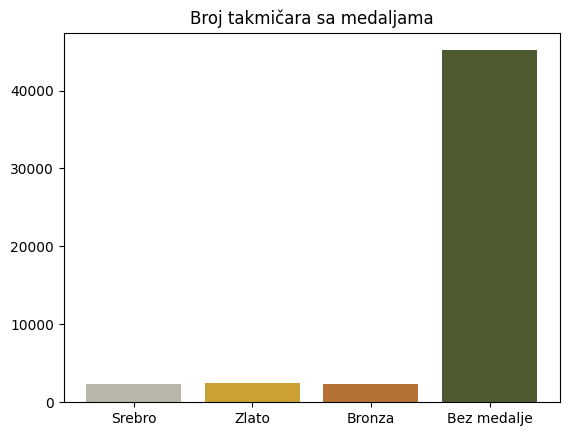

In [10]:
boje = ['#BAB6AA', '#CBA135', '#B67233', '#4E5B31']
plt.bar(['Srebro', 'Zlato', 'Bronza', 'Bez medalje'], [medalje[1], medalje[0], medalje[2], data.Medal.isna().sum()], color = boje)
plt.title('Broj takmičara sa medaljama')
plt.plot()

In [11]:
data.Medal.isna().sum()

45165

## Odnos među polovima

Medju nasim podacima vidimo da je više muškaraca nego žena

[]

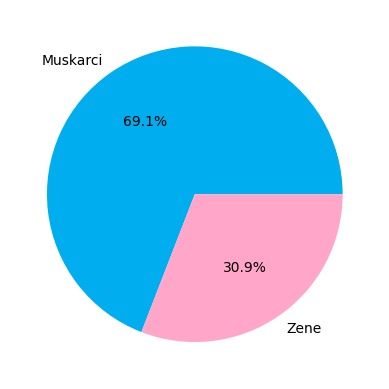

In [12]:
pol = data.Sex.value_counts()

labels = ['Muskarci', 'Zene']
sizes = pol.values
boje = ['#00AEEF', '#FFA6C9']

plt.pie(sizes, labels=labels, colors = boje, autopct = '%.1f%%')
plt.plot()

## Dvadeset dršava sa najviše takmičara na olimpijadi

[]

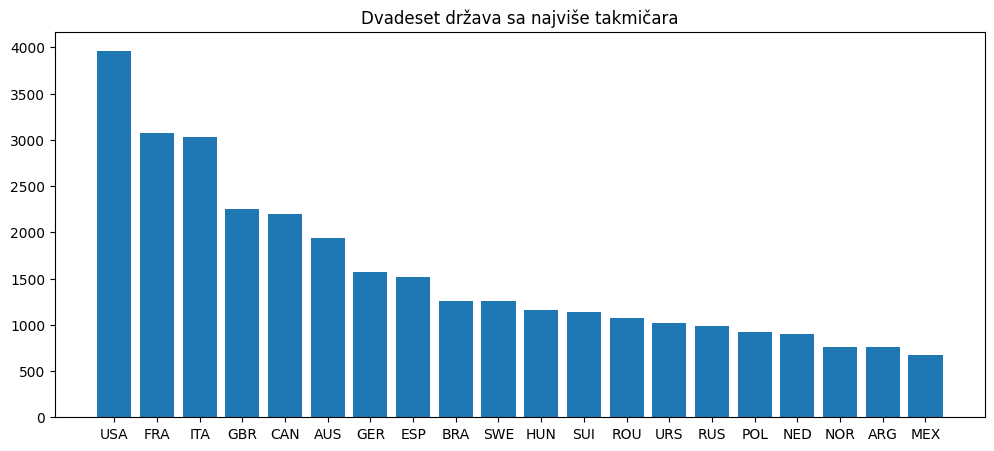

In [14]:
drzave = data.NOC.value_counts()
plt.figure(figsize=(12, 5))
plt.bar(drzave.keys()[:20], drzave.values[:20])
plt.title('Dvadeset država sa najviše takmičara')
plt.plot()

## Eksportovanje podataka

In [15]:
putanja = 'preprocesiranje/bez_nedostajucih.csv'
data.to_csv(putanja, index=False)